In [1]:
# Install necessary packages
!pip install pandas scikit-learn matplotlib

In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [3]:
# Read the dataset
icecream_df = pd.read_csv("E:/BOOTCAMP/ASSIGNMENTS/SCMA/icecream.csv")

In [4]:
# Inspect the dataset
print(icecream_df.shape)
print(icecream_df.columns)
print(icecream_df.head())

(10, 7)
Index(['Brand', 'Price', 'Availability', 'Taste', 'Flavour', 'Consistency',
       'Shelflife'],
      dtype='object')
     Brand  Price  Availability  Taste  Flavour  Consistency  Shelflife
0     Amul      4             5      4        3            4          3
1  Nandini      3             2      3        2            3          3
2  Vadilal      2             2      4        3            4          4
3   Vijaya      3             1      3        5            3          4
4    Dodla      3             3      3        4            4          3


In [5]:

# Select the relevant columns for MDS (excluding 'Brand')
ice = icecream_df.drop(columns=['Brand'])

In [6]:
# Standardize the data
scaler = StandardScaler()
ice_scaled = scaler.fit_transform(ice)

In [7]:
# Compute the distance matrix
distance_matrix = np.linalg.norm(ice_scaled[:, np.newaxis] - ice_scaled, axis=2)

In [8]:
# Perform MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=123)
mds_result = mds.fit_transform(distance_matrix)

D:\New folder\Python\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Text(0, 0.5, 'Dimension 2')

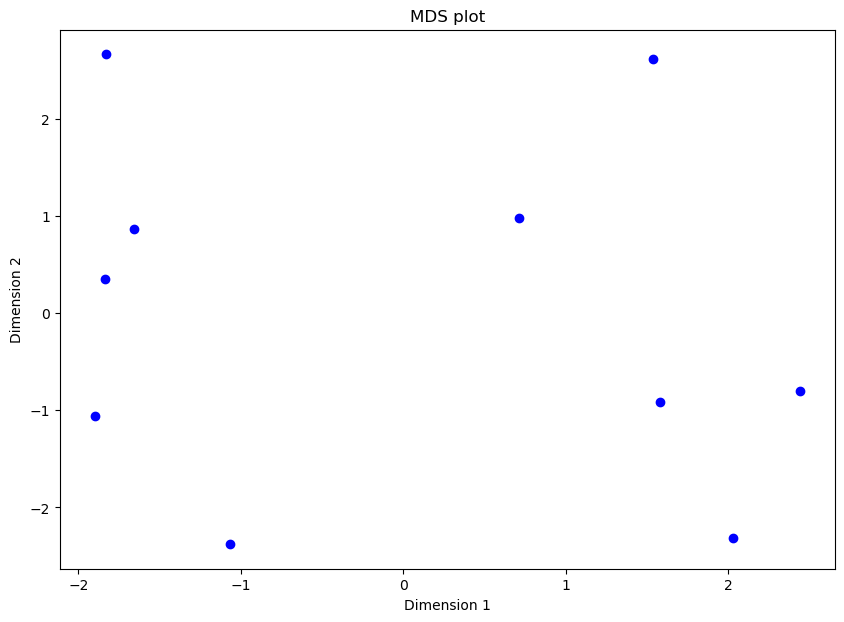

In [9]:

# Plot the MDS results
plt.figure(figsize=(10, 7))
plt.scatter(mds_result[:, 0], mds_result[:, 1], c='blue', marker='o')
plt.title('MDS plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

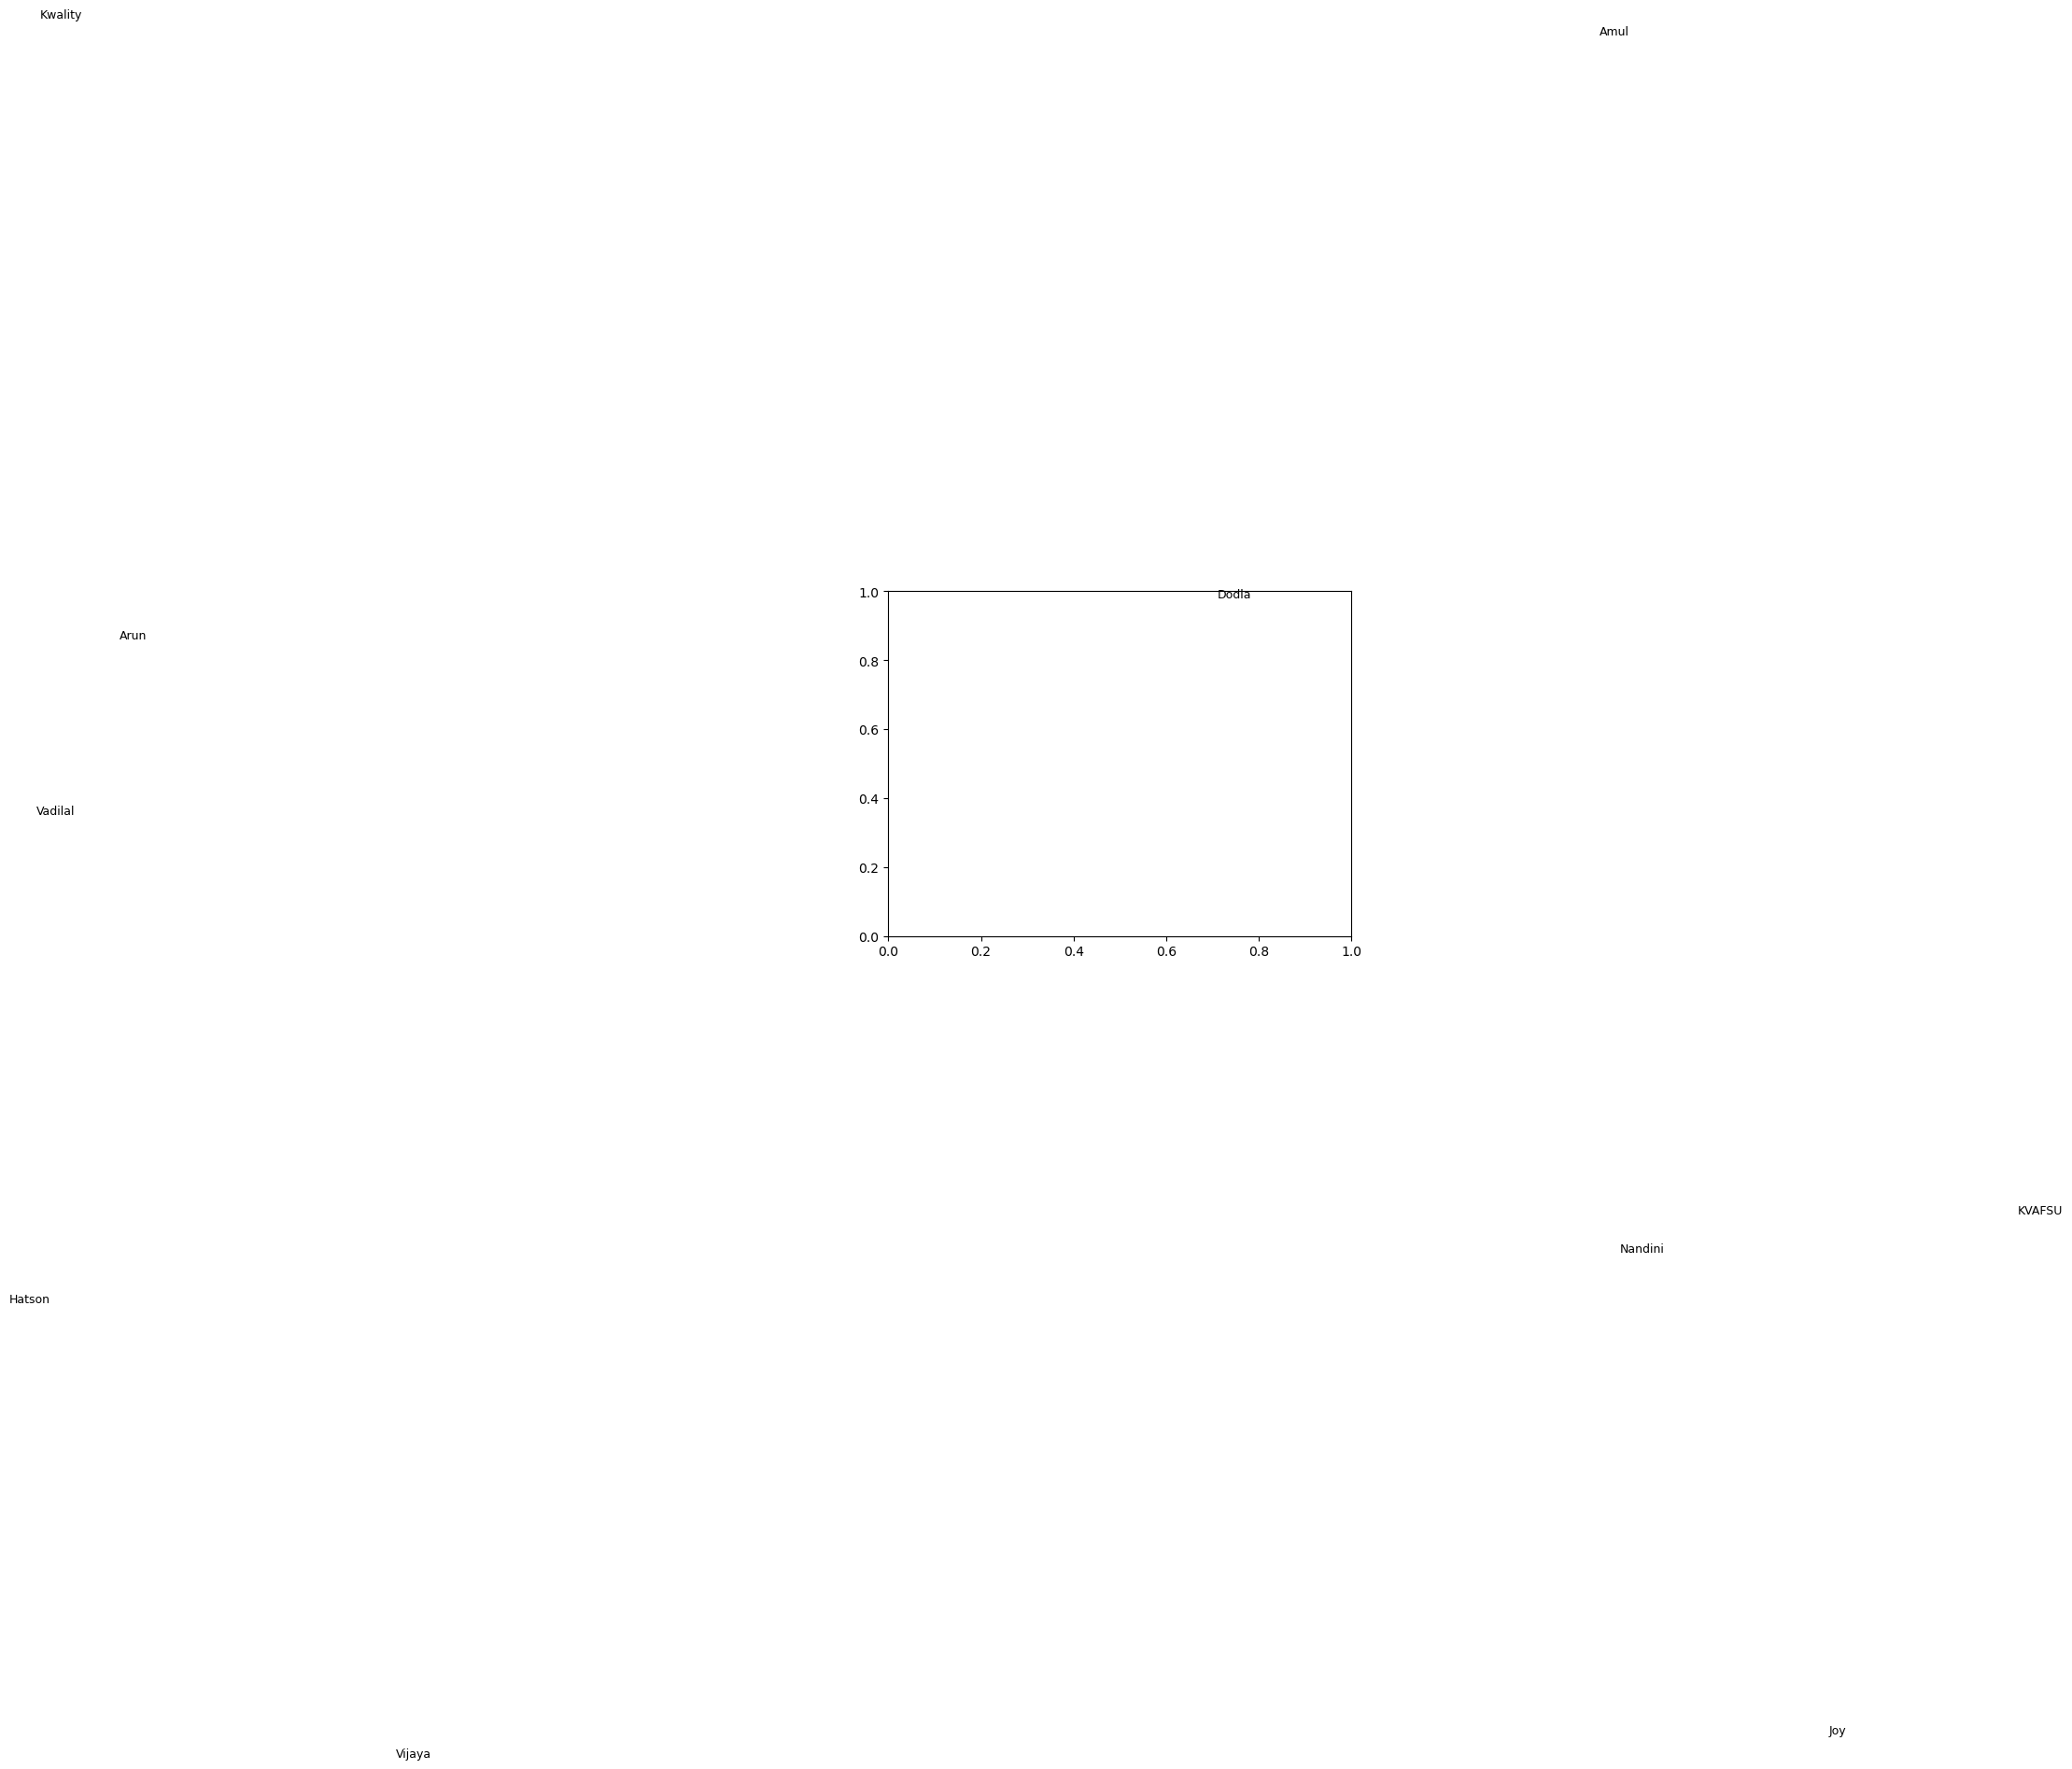

In [10]:
# Annotate points with their respective brand names
for i, brand in enumerate(icecream_df['Brand']):
    plt.text(mds_result[i, 0], mds_result[i, 1], brand, fontsize=9)

plt.show()